In [2]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

# Load dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# Shape and Info
print(df.shape)
df.info()

# Summary statistics
df.describe()


(178, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


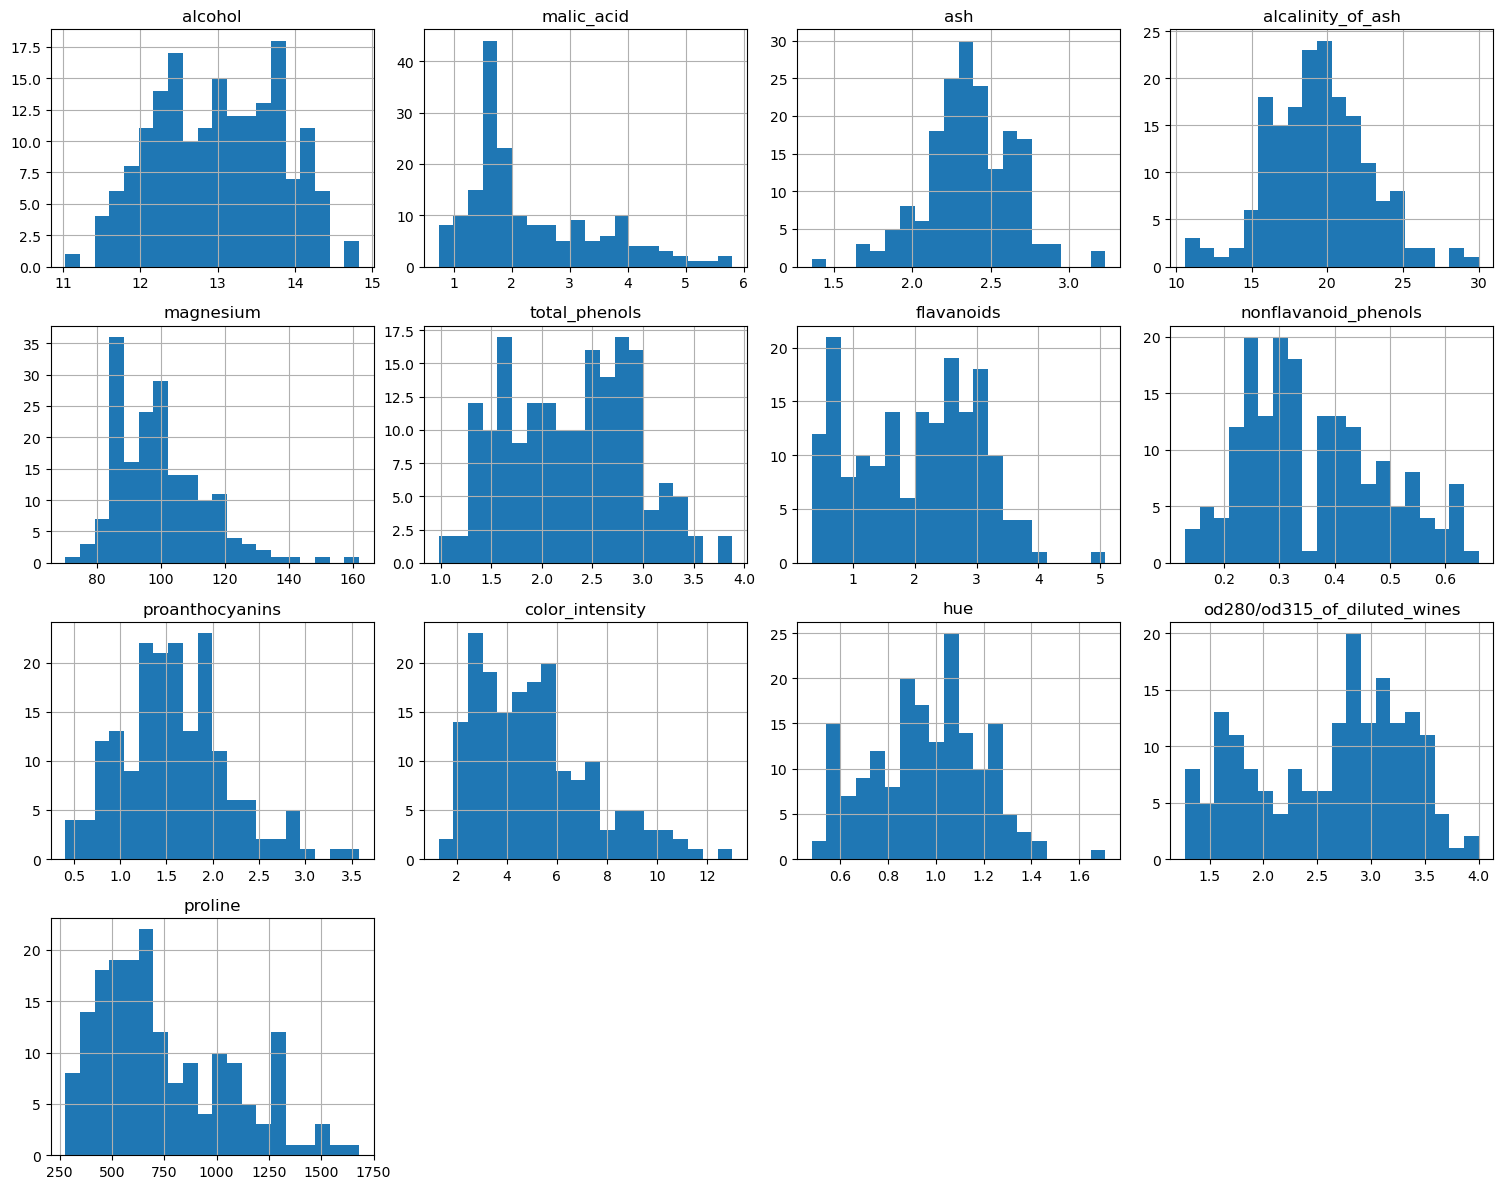

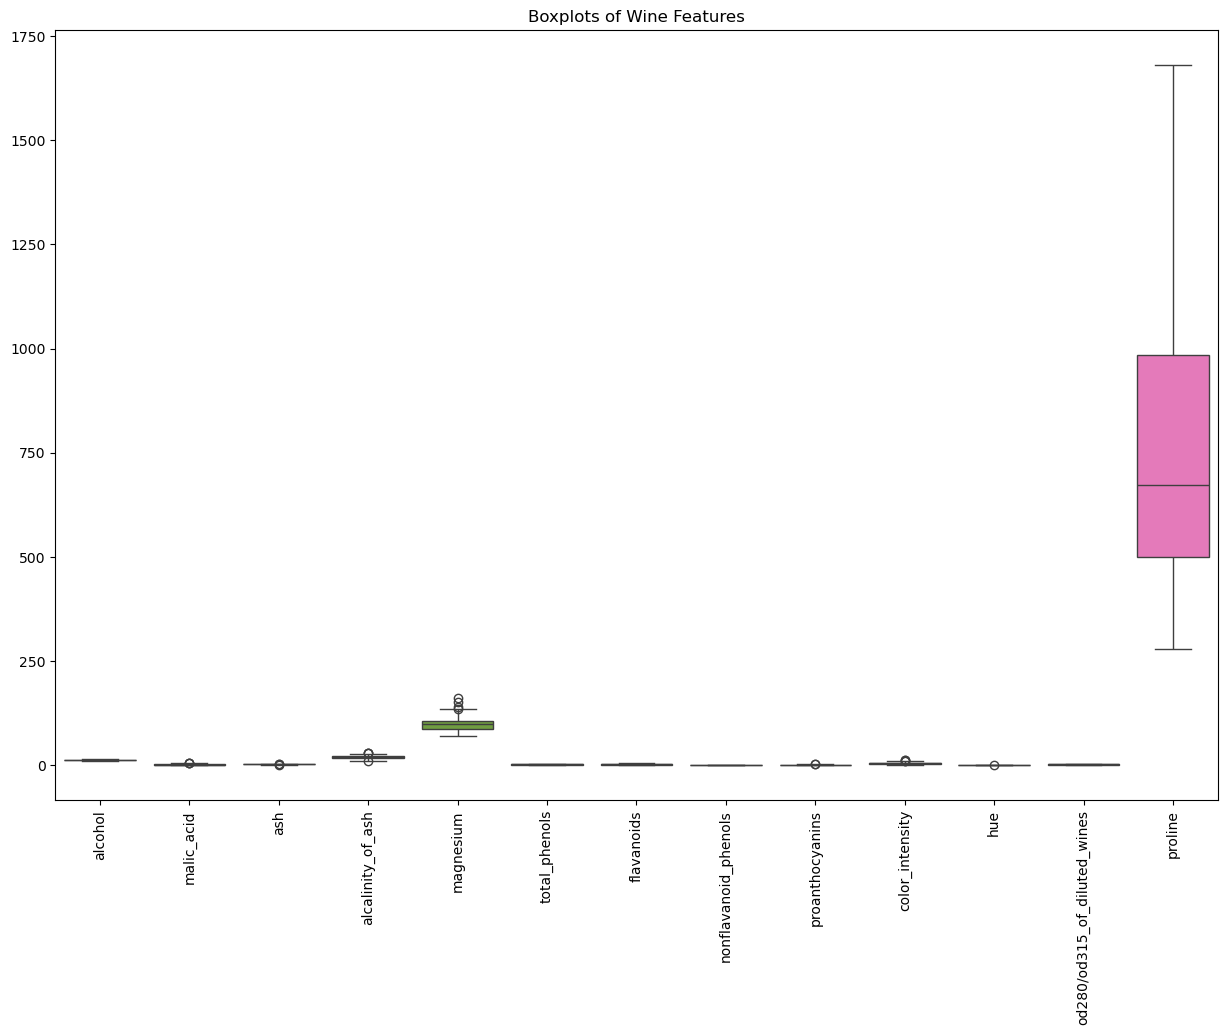

In [6]:
# Histograms
df.iloc[:, :-1].hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title("Boxplots of Wine Features")
plt.show()


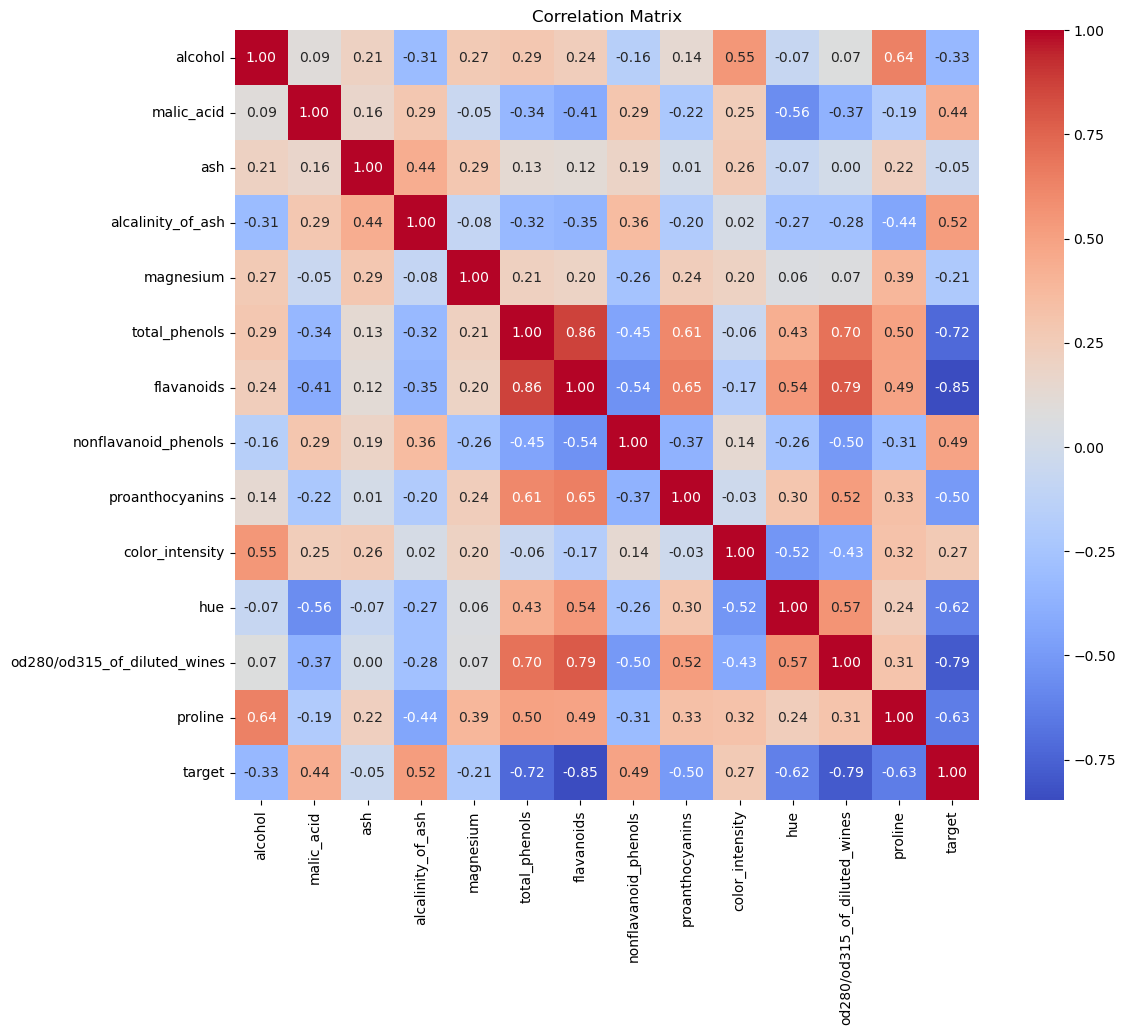

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [10]:
# Task 2: Dimensionality Reduction with PCA

In [12]:
features = df.drop('target', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


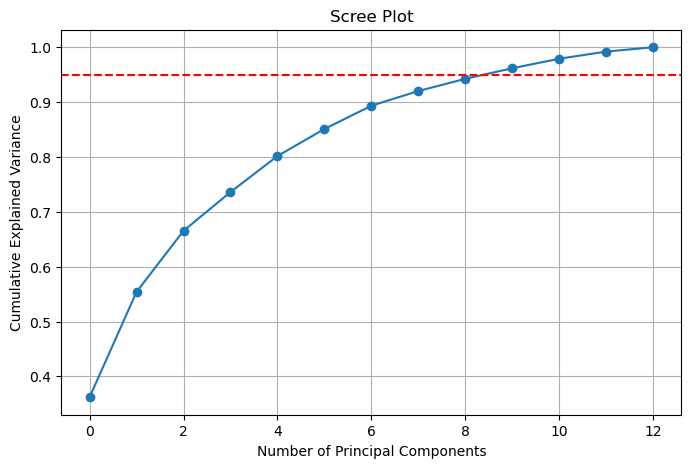

In [14]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.title("Scree Plot")
plt.axhline(y=0.95, color='r', linestyle='--')  # threshold line
plt.show()


In [16]:
# Use first N components
pca_n = PCA(n_components=2) 
X_pca_n = pca_n.fit_transform(X_scaled)


In [20]:
# Task 3: Clustering on Original Data

In [22]:
kmeans_orig = KMeans(n_clusters=3, random_state=42)
clusters_orig = kmeans_orig.fit_predict(X_scaled)


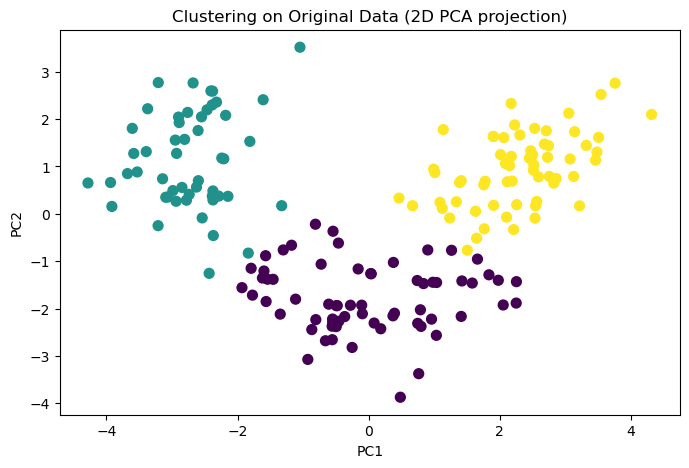

In [24]:
# Reduce to 2D using PCA for visualization
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=clusters_orig, cmap='viridis', s=50)
plt.title("Clustering on Original Data (2D PCA projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [26]:
print("Silhouette Score (Original):", silhouette_score(X_scaled, clusters_orig))
print("Davies-Bouldin Index (Original):", davies_bouldin_score(X_scaled, clusters_orig))


Silhouette Score (Original): 0.2848589191898987
Davies-Bouldin Index (Original): 1.3891879777181646


In [28]:
# Task 4: Clustering on PCA-Transformed Data

In [30]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca_n)


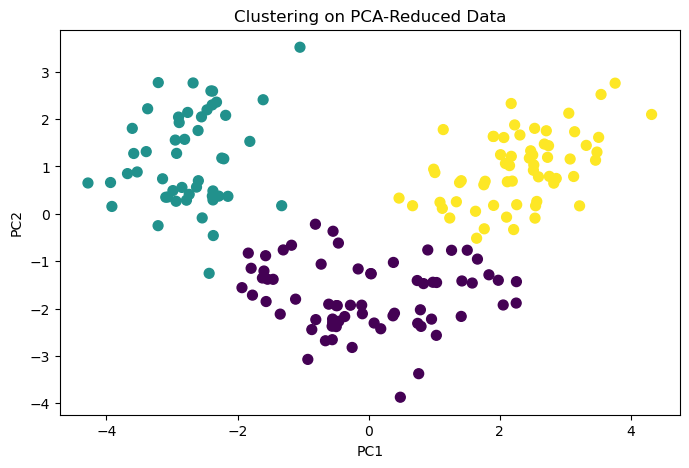

In [32]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca_n[:, 0], X_pca_n[:, 1], c=clusters_pca, cmap='viridis', s=50)
plt.title("Clustering on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [34]:
print("Silhouette Score (PCA):", silhouette_score(X_pca_n, clusters_pca))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(X_pca_n, clusters_pca))


Silhouette Score (PCA): 0.5601697480957203
Davies-Bouldin Index (PCA): 0.5977226208167409


In [36]:
# Task 5: Comparison and Analysis

In [38]:
# Print evaluation comparison
print("\n--- Comparison ---")
print("Original Data:")
print("Silhouette Score:", silhouette_score(X_scaled, clusters_orig))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, clusters_orig))

print("\nPCA-Reduced Data:")
print("Silhouette Score:", silhouette_score(X_pca_n, clusters_pca))
print("Davies-Bouldin Index:", davies_bouldin_score(X_pca_n, clusters_pca))



--- Comparison ---
Original Data:
Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.3891879777181646

PCA-Reduced Data:
Silhouette Score: 0.5601697480957203
Davies-Bouldin Index: 0.5977226208167409


In [40]:
# Analysis:
# Similarity: Cluster patterns are visually similar in PCA and original.

# Difference: PCA reduces noise, improving clustering clarity in fewer dimensions.

# Impact: PCA may improve performance or speed but can sometimes lose minor feature details

In [42]:
# Task 6: Conclusion and Insights

In [ ]:
# 1. **Key Findings:**
#    - PCA reduced dimensions effectively with minimal information loss.
#    - Clustering on both datasets produced comparable results.
#    - Silhouette and Davies–Bouldin scores helped evaluate clustering quality.

# 2. **Practical Implications:**
#    - PCA is useful for simplifying data without sacrificing too much performance.
#    - It helps reduce computational cost and visualizes high-dimensional data.

# 3. **Recommendations:**
#    - Use PCA when dealing with many features or multicollinearity.
#    - Skip PCA if model interpretability is crucial, or feature importance must be retained.

